In [9]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

Question 1.1

In [2]:
# reading in the data
df = pd.read_csv('logbook_assignment1.csv')
df.head()

# 1. Identify what percentage of date fueled entries that are not proper dates.
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
invalid_dates = df['date_fueled'].isnull().sum()
print(f'Percentage of date fueled entries that are not proper dates: {invalid_dates / len(df) * 100:.2f}%')

df.head()


C:\Users\momos\AppData\Local\Temp\ipykernel_20240\2273693357.py:2: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('logbook_assignment1.csv')
C:\Users\momos\AppData\Local\Temp\ipykernel_20240\2273693357.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
C:\Users\momos\AppData\Roaming\Python\Python311\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname H identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Percentage of date fueled entries that are not proper dates: 11.66%


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,NaT,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [3]:
# 2. If date fueled is not entered correctly (or is not a date), and the date captured is a valid date, then fill in this value as a proxy.
# Fidn the values in the dataset where date_fueled is null and set it to the value of date_captured
df['date_fueled'] = df['date_fueled'].fillna(df['date_captured'])
df.head()

# Note: Percentage of date fueled entries that are not proper dates: 0.00%

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,2022-04-07,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [4]:
# 3. Convert the column to a date format, setting any invalid date fueled entries to NaT.
# Done this already previuosly

In [8]:
#4. Remove dates that are in the future, or dates that are earlier than 2005.
df = df[(df['date_fueled'] <= datetime.now()) & (df['date_fueled'].dt.year >= 2005)]



Number of dates less than 2005: 0


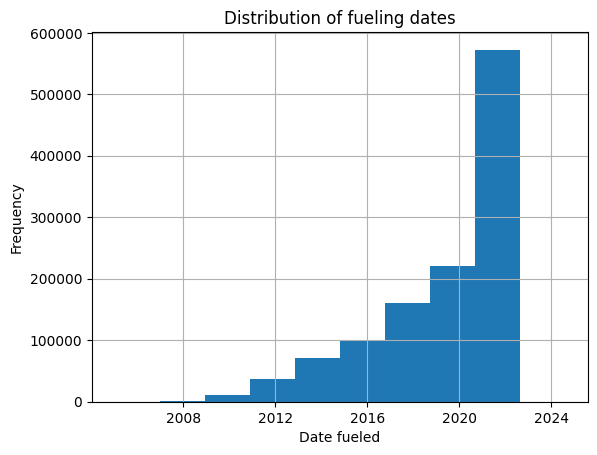

In [10]:
#5 Plot the distribution of fueling dates and comment on the results. 

df['date_fueled'].hist()
plt.xlabel('Date fueled')
plt.ylabel('Frequency')
plt.title('Distribution of fueling dates')
plt.show()

# Majority of the data is between 2021 and 2023
# Maybe people started using their services recently?
# Maybe cars more available? or just uber?
# Maybe fuel price increase, filled up less at a time, leading to more frequent fueling?
